In [7]:
# Step 1: Import Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
# Step 2: Load Dataset
# =============================
df = pd.read_csv("retail_loss_prevention.csv")
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

✅ Dataset loaded successfully!
Shape: (50, 2)
   TransactionID                           Items
0              1  Razor,Shaving Cream,Aftershave
1              2       Baby Formula,Diapers,Beer
2              3                Lipstick,Perfume
3              4      Razor,Deodorant,Aftershave
4              5              Cigarettes,Lighter


In [9]:
# Step 3: Transaction Encoding
# =============================
transactions = df['Items'].apply(lambda x: x.split(',')).tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
print("\n✅ Encoded Transactions:")
print(df_encoded.head())



✅ Encoded Transactions:
   Aftershave  Baby Formula  Batteries   Beer  Chips  Cigarettes  Deodorant  \
0        True         False      False  False  False       False      False   
1       False          True      False   True  False       False      False   
2       False         False      False  False  False       False      False   
3        True         False      False  False  False       False       True   
4       False         False      False  False  False        True      False   

   Diapers  Energy Drink  Lighter  Lipstick  Makeup Kit  Perfume  Razor  \
0    False         False    False     False       False    False   True   
1     True         False    False     False       False    False  False   
2    False         False    False      True       False     True  False   
3    False         False    False     False       False    False   True   
4    False         False     True     False       False    False  False   

   Shaving Cream  
0           True  
1          

In [4]:
# =============================
# Step 3: Frequent Itemsets
# =============================
frequent_itemsets = apriori(df_encoded, min_support=0.2, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support               itemsets
0      0.30              (Battery)
1      0.55                 (Beer)
2      0.45                (Bread)
3      0.25               (Butter)
4      0.35                (Chips)
5      0.45                 (Milk)
6      0.35                (Razor)
7      0.30        (Beer, Battery)
8      0.35          (Beer, Chips)
9      0.35          (Beer, Razor)
10     0.25        (Bread, Butter)
11     0.45          (Bread, Milk)
12     0.25         (Butter, Milk)
13     0.20         (Chips, Razor)
14     0.20   (Beer, Chips, Razor)
15     0.25  (Milk, Bread, Butter)


In [10]:
# Step 4: Apply Apriori Algorithm
# =============================
frequent_items = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_items = frequent_items.sort_values(by="support", ascending=False)
print("\n✅ Frequent Itemsets Found:", len(frequent_items))
print(frequent_items.head(10))



✅ Frequent Itemsets Found: 20
    support               itemsets
1      0.28         (Baby Formula)
2      0.28                 (Beer)
12     0.26   (Beer, Baby Formula)
3      0.24           (Cigarettes)
15     0.24  (Cigarettes, Lighter)
6      0.24              (Lighter)
9      0.24              (Perfume)
10     0.20                (Razor)
0      0.18           (Aftershave)
4      0.18            (Deodorant)


In [11]:
# Step 5: Generate Association Rules
# =============================
if not frequent_items.empty:
    rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)
    rules = rules.sort_values(by="lift", ascending=False)
    print("\n✅ Association Rules Generated:", len(rules))
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
else:
    print("⚠️ No frequent itemsets found. Try lowering min_support.")


✅ Association Rules Generated: 22
        antecedents      consequents  support  confidence      lift
4      (Aftershave)          (Razor)     0.18    1.000000  5.000000
5           (Razor)     (Aftershave)     0.18    0.900000  5.000000
3         (Lighter)     (Cigarettes)     0.24    1.000000  4.166667
2      (Cigarettes)        (Lighter)     0.24    1.000000  4.166667
13       (Lipstick)        (Perfume)     0.10    1.000000  4.166667
12        (Perfume)       (Lipstick)     0.10    0.416667  4.166667
15     (Makeup Kit)        (Perfume)     0.10    1.000000  4.166667
14        (Perfume)     (Makeup Kit)     0.10    0.416667  4.166667
20   (Baby Formula)  (Beer, Diapers)     0.10    0.357143  3.571429
17  (Beer, Diapers)   (Baby Formula)     0.10    1.000000  3.571429


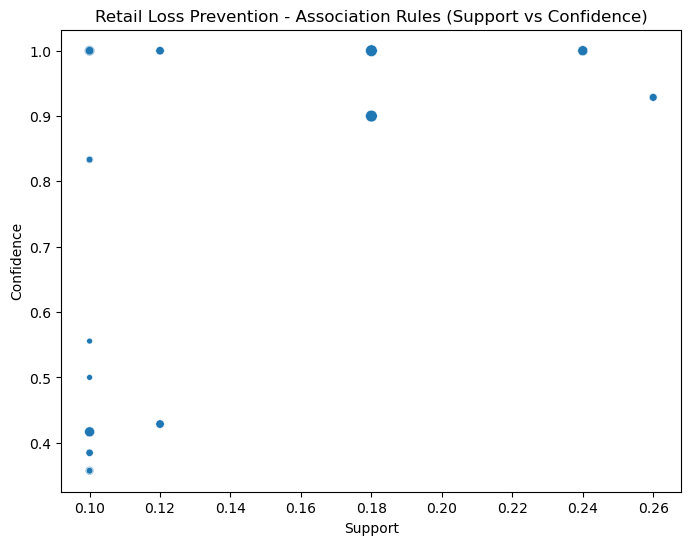

In [12]:
# Step 6: Visualization - Support vs Confidence
# =============================
if not frequent_items.empty and not rules.empty:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x="support", y="confidence", size="lift", data=rules, legend=False)
    plt.title("Retail Loss Prevention - Association Rules (Support vs Confidence)")
    plt.xlabel("Support")
    plt.ylabel("Confidence")
    plt.show()
else:
    print("⚠️ No rules to visualize.")

In [13]:
# Step 7: Display Top 5 Rules
# =============================
if not rules.empty:
    print("\n🧠 Top 5 Suspicious Item Association Rules:")
    for i, row in rules.head(5).iterrows():
        print(f"{set(row['antecedents'])} → {set(row['consequents'])} "
              f"(support={row['support']:.2f}, confidence={row['confidence']:.2f}, lift={row['lift']:.2f})")
else:
    print("⚠️ No rules available to display.")


🧠 Top 5 Suspicious Item Association Rules:
{'Aftershave'} → {'Razor'} (support=0.18, confidence=1.00, lift=5.00)
{'Razor'} → {'Aftershave'} (support=0.18, confidence=0.90, lift=5.00)
{'Lighter'} → {'Cigarettes'} (support=0.24, confidence=1.00, lift=4.17)
{'Cigarettes'} → {'Lighter'} (support=0.24, confidence=1.00, lift=4.17)
{'Lipstick'} → {'Perfume'} (support=0.10, confidence=1.00, lift=4.17)
